In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, shapiro, f_oneway
from statsmodels.stats.multicomp import MultiComparison

 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [ ]:
# Шаблон
# def check_normality(data):
#     #
#     # Ваш код
#     #
#     if # условие статистической значимости
#         print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
#     else:
#         print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
def check_normality(data):
    # Выполняем тест Шапиро-Уилка
    _, p_value = stats.shapiro(data)

    alpha = 0.05 # Уровень значимости

    # Проверяем статистическую значимость
    if p_value < alpha:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
data = [1, 2, 3, 4, 5]
check_normality(data)

Не отклоняем нулевую гипотезу >> Данные распределены нормально


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [ ]:
# Выполняем t-Тест Стьюдента
t_statistic, p_value = ttest_ind(mens, womens, equal_var=False)

print(f"t-stat = {t_statistic:.5f}, p-value = {p_value:.5f}")
if p_value > 0.001:
  print("Не отклоняем нулевую гипотезу, различие между выборками, вероятно, незначительно")
else:
  print("Отклоняем нулевую гипотезу, различие между выборками, вероятно, значительно")

t-stat = 28.31364, p-value = 0.00000
Отклоняем нулевую гипотезу, различие между выборками, вероятно, значительно


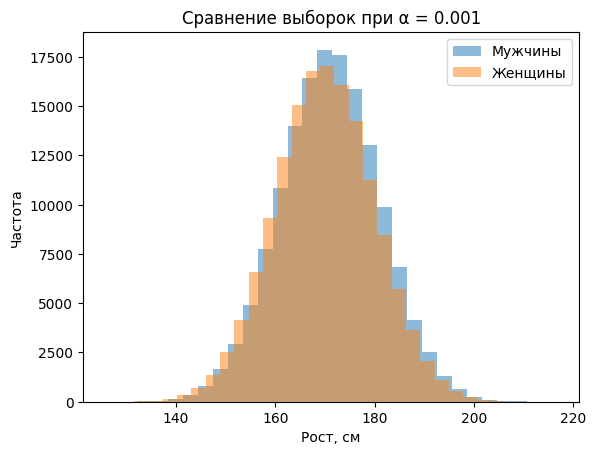

In [ ]:
plt.hist(mens, bins=30, alpha=0.5, label='Мужчины')
plt.hist(womens, bins=30, alpha=0.5, label='Женщины')
plt.legend(loc='upper right')
plt.title('Сравнение выборок при α = 0.001')
plt.xlabel('Рост, см')
plt.ylabel('Частота')
plt.show()

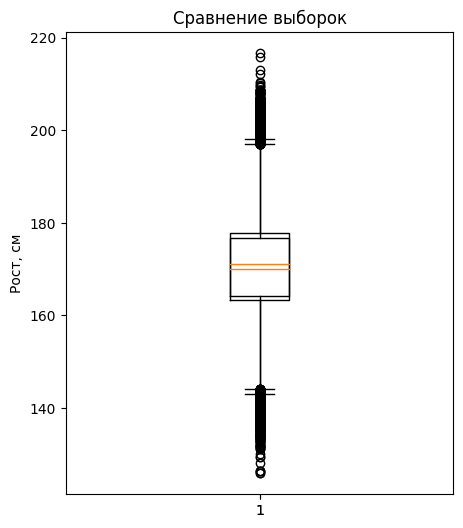

In [ ]:
fig, ax = plt.subplots(figsize = (5,6))

plt.boxplot(mens);
plt.boxplot(womens);

ax.set_ylabel('Рост, см')
ax.set_title('Сравнение выборок')

plt.show()

Результат Т-теста показывает, что при уровне значимости α = 0.001, различие между выборками роста мужчин и женщин является значительным, так как p-value меньше α. Это означает, что статистические различия между выборками достаточно сильны, чтобы быть значимыми.

Однако с практической точки зрения разница в средних роста в группах на 1 см является незначительной. Для определения значимости данных выводов следует учитывать контекст исследования.

<div class="alert alert-info">
<b>Задание № 3</b>

Специалистка по кадрам, работающая в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

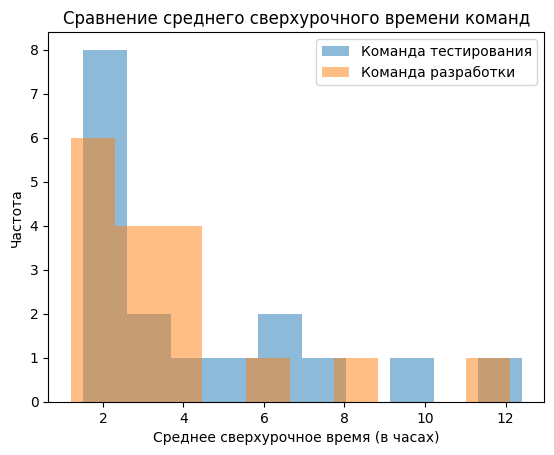

In [ ]:
plt.hist(test_team, alpha=0.5, label='Команда тестирования')
plt.hist(developer_team, alpha=0.5, label='Команда разработки')
plt.title('Сравнение среднего сверхурочного времени команд')
plt.legend(loc='upper right')
plt.xlabel('Среднее сверхурочное время (в часах)')
plt.ylabel('Частота')
plt.show()

In [ ]:
stat_test_team, p_value_test_team = shapiro(test_team)
stat_developer_team, p_value_developer_team = shapiro(developer_team)

print(f'Тест Шапиро-Уилка для команды тестирования\np-value = {p_value_test_team:.5f}')
if p_value_test_team > 0.05:
  print('Не отклоняем гипотезу >> Вероятно данные распределены нормально')
else:
  print('Отклоняем гипотезу >> Вероятно данные не распределены нормально')

print(f'\nТест Шапиро-Уилка для команды разработки\np-value = {p_value_developer_team:.5f}')
if p_value_developer_team > 0.05:
  print('Не отклоняем гипотезу >> Вероятно данные распределены нормально')
else:
  print('Отклоняем гипотезу >> Вероятно данные не распределены нормально')

Тест Шапиро-Уилка для команды тестирования
p-value = 0.00462
Отклоняем гипотезу >> Вероятно данные не распределены нормально

Тест Шапиро-Уилка для команды разработки
p-value = 0.00049
Отклоняем гипотезу >> Вероятно данные не распределены нормально


Видим, что распределение не нормальное. Используем критерий Манна-Уитни

In [ ]:
statistic, p_value = stats.mannwhitneyu(test_team, developer_team)

print(f'Тест Манна-Уитни:\nСтатистика = {statistic}\np-value = {p_value:.5f}')
if p_value > 0.05:
  print("Не отклоняем нулевую гипотезу >> Распределения, вероятно, одинаковые")
else:
  print("Отклоняем нулевую гипотезу >> Распределения, вероятно, различаются")

Тест Манна-Уитни:
Статистика = 151.5
p-value = 0.82265
Не отклоняем нулевую гипотезу >> Распределения, вероятно, одинаковые


На основании тестирования делаем вывод о том, что значимой разницы в переутомляемости между командами  нет.

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [ ]:
# Проверка предположения о нормальности для каждой группы
p_value_breast = shapiro(only_breast)[1]
p_value_formula = shapiro(only_formula)[1]
p_value_both = shapiro(both)[1]

# Проверка групп на нормальность данных
if p_value_breast > 0.05 and p_value_formula > 0.05 and p_value_both > 0.05:
    print("Данные во всех группах являются нормально распределенными")
else:
    print("Данные в одной или нескольких группах не являются нормально распределенными")

Данные во всех группах являются нормально распределенными


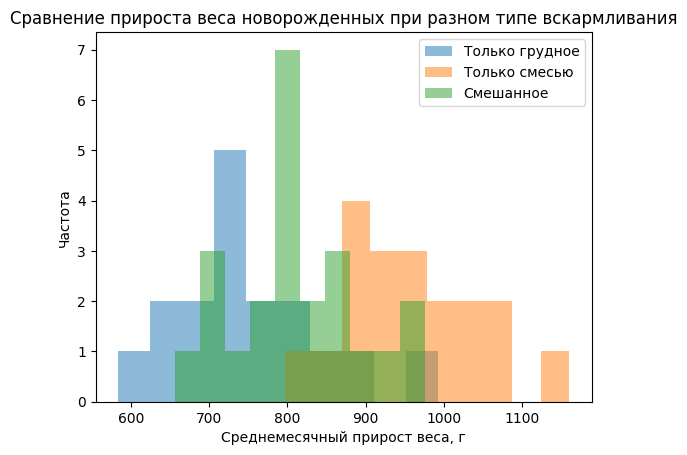

In [ ]:
plt.hist(only_breast, alpha=0.5, label='Только грудное')
plt.hist(only_formula, alpha=0.5, label='Только смесью')
plt.hist(both, alpha=0.5, label='Смешанное')
plt.legend(loc='upper right')
plt.title('Сравнение прироста веса новорожденных при разном типе вскармливания')
plt.xlabel('Среднемесячный прирост веса, г')
plt.ylabel('Частота')
plt.show()

Проведём однофакторный дисперсионный анализ (ANOVA)

In [ ]:
statistic, p_value = f_oneway(only_breast, only_formula, both)

print('ANOVA:')
print(f'F-statistic: {statistic:.5f}')
print(f'p-value: {p_value:.8f}')

ANOVA:
F-statistic: 26.70125
p-value: 0.00000001


Т.к. p-value меньше уровня значимости, то продолжаем с Тьюки

In [ ]:
if p_value < 0.05:
    # Выполнимм множественное сравнение с использованием теста Тьюки
    data = np.concatenate([only_breast, only_formula, both])
    groups = ((['only_breast'] * len(only_breast)) +
              (['only_formula'] * len(only_formula)) +
              (['both'] * len(both)))

    mc = MultiComparison(data, groups)
    result = mc.tukeyhsd()

    print('Тест Тьюки:')
    print(result)

Тест Тьюки:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       both  only_breast -60.1286 0.0995 -129.1485   8.8912  False
       both only_formula 149.2636    0.0   82.3651 216.1621   True
only_breast only_formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


На основе проведённого анализа мы можем заключить, что есть статистически значимая разница между средними значениями групп `both` и `only_formula` и групп `only_breast` и `only_formula`, но нет статистически значимой разницы между средними значениями групп `both` и `only_breast`.

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [ ]:
# contingency_table = pd.DataFrame(
#     [
#         [53, 23, 30, 36, 88],
#         [71, 48, 51, 57, 203]
#     ],
#     #columns = ['Machine Learning', 'Data Science', 'Analytics'],
#     index = ['Ж', 'М'])

# print('Уровень риска')
# print(contingency_table)

<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]